/opt/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


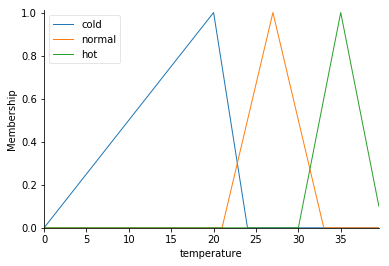

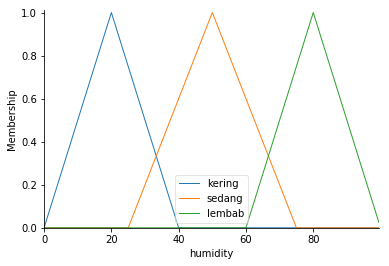

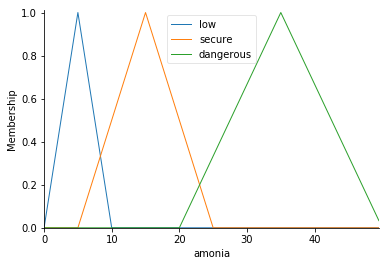

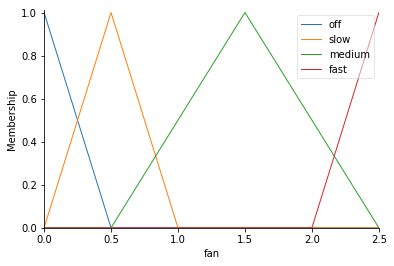

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import sys
% matplotlib inline

# The universe of variables and membership functions
temperature = ctrl.Antecedent(np.arange(0, 40, 0.5), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 100, 0.5), 'humidity')
amonia = ctrl.Antecedent(np.arange(0, 50, 0.5), 'amonia')
fan= ctrl.Consequent(np.arange(0.0, 3.0, 0.5 ), 'fan')

# rule
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 20, 24])
temperature['normal'] = fuzz.trimf(temperature.universe, [21, 27, 33])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 35, 40])

humidity['kering'] = fuzz.trimf(humidity.universe, [0, 20, 40])
humidity['sedang'] = fuzz.trimf(humidity.universe, [25, 50, 75])
humidity['lembab'] = fuzz.trimf(humidity.universe, [60, 80, 100])

amonia['low'] = fuzz.trimf(amonia.universe, [0, 5, 10])
amonia['secure'] = fuzz.trimf(amonia.universe, [5, 15, 25])
amonia['dangerous'] = fuzz.trimf(amonia.universe, [20, 35, 50])

fan['off'] = fuzz.trapmf(fan.universe, [0.0, 0.0, 0.05, 0.07])
fan['slow'] = fuzz.trimf(fan.universe, [0.1, 0.5, 1.0])
fan['medium'] = fuzz.trimf(fan.universe, [0.5, 1.5, 2.5])
fan['fast'] = fuzz.trimf(fan.universe, [2.0, 2.5, 3.0])

temperature.view()
humidity.view()
amonia.view()
fan.view()

# declare the rules
rule1 = ctrl.Rule(temperature['cold'] & humidity['lembab'] & amonia['low'], fan['off'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['sedang'] & amonia['low'], fan['off'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['kering'] & amonia['low'], fan['off'])
rule4 = ctrl.Rule(temperature['cold'] & humidity['lembab'] & amonia['secure'], fan['off'])
rule5 = ctrl.Rule(temperature['cold'] & humidity['sedang'] & amonia['secure'], fan['off'])
rule6 = ctrl.Rule(temperature['cold'] & humidity['kering'] & amonia['secure'], fan['off'])
rule7 = ctrl.Rule(temperature['cold'] & humidity['lembab'] & amonia['dangerous'], fan['slow'])
rule8 = ctrl.Rule(temperature['cold'] & humidity['sedang'] & amonia['dangerous'], fan['slow'])
rule9 = ctrl.Rule(temperature['cold'] & humidity['kering'] & amonia['dangerous'], fan['slow'])

rule10 = ctrl.Rule(temperature['normal'] & humidity['lembab'] & amonia['low'], fan['off'])
rule11 = ctrl.Rule(temperature['normal'] & humidity['sedang'] & amonia['low'], fan['slow'])
rule12 = ctrl.Rule(temperature['normal'] & humidity['kering'] & amonia['low'], fan['slow'])
rule13 = ctrl.Rule(temperature['normal'] & humidity['lembab'] & amonia['secure'], fan['slow'])
rule14 = ctrl.Rule(temperature['normal'] & humidity['sedang'] & amonia['secure'], fan['medium'])
rule15 = ctrl.Rule(temperature['normal'] & humidity['kering'] & amonia['secure'], fan['fast'])
rule16 = ctrl.Rule(temperature['normal'] & humidity['lembab'] & amonia['dangerous'], fan['medium'])
rule17 = ctrl.Rule(temperature['normal'] & humidity['sedang'] & amonia['dangerous'], fan['medium'])
rule18 = ctrl.Rule(temperature['normal'] & humidity['kering'] & amonia['dangerous'], fan['fast'])

rule19 = ctrl.Rule(temperature['hot'] & humidity['lembab'] & amonia['low'], fan['medium'])
rule20 = ctrl.Rule(temperature['hot'] & humidity['sedang'] & amonia['low'], fan['fast'])
rule21 = ctrl.Rule(temperature['hot'] & humidity['kering'] & amonia['low'], fan['fast'])
rule22 = ctrl.Rule(temperature['hot'] & humidity['lembab'] & amonia['secure'], fan['medium'])
rule23 = ctrl.Rule(temperature['hot'] & humidity['sedang'] & amonia['secure'], fan['fast'])
rule24 = ctrl.Rule(temperature['hot'] & humidity['kering'] & amonia['secure'], fan['fast'])
rule25 = ctrl.Rule(temperature['hot'] & humidity['lembab'] & amonia['dangerous'], fan['fast'])
rule26 = ctrl.Rule(temperature['hot'] & humidity['sedang'] & amonia['dangerous'], fan['fast'])
rule27 = ctrl.Rule(temperature['hot'] & humidity['kering'] & amonia['dangerous'], fan['fast'])

fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                              rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                              rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])
#simulasi 

f = ctrl.ControlSystemSimulation(fan_ctrl)

f.input['temperature'] = 33 
f.input['humidity'] = 60
f.input['amonia'] = 10

# f.input['temperature']= sys.argv[1]
# f.input['humidity']= sys.argv[2]
# f.input['amonia']=sys.argv[3]

f.compute()


fan speed =  2.3055555555555554


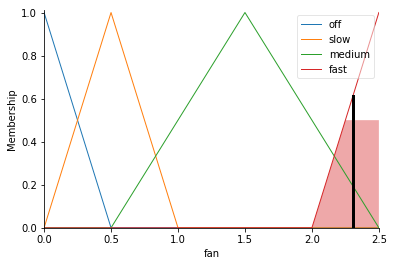

In [2]:
print("fan speed = "), f.output['fan']
fan.view(sim=f)

In [86]:
a = ctrl.ControlSystemSimulation(fan_ctrl)

a.input['temperature']= 16
a.input['humidity']= 90
a.input['amonia']=5

a.compute()

In [87]:
r = str(a.output['fan'])

In [88]:
r

'0.19444444444444442'

In [89]:
type(r)

str

In [117]:
import random 
import pysolr
import ast
import pandas as pd
from datetime import datetime

temp = random.randint(15,40)
hum= random.randint(1,100)
amo = random.randint(1,50)
date_now = datetime.now().strftime("%Y-%m-%d")
time_now = datetime.now().strftime("%H:%M:%S")
upload_at = str(date_now)+ 'T' + str(time_now) + 'Z'

get_val = 'temperature '+str(temp)+'\nhumidity '+str(hum)+'\namonia '+str(amo)+'\nupload_at '+upload_at
dicc = dict()
for i in ([x.split() for x in get_val.splitlines()]):
    dicc[i[0]] = str(i[1])
dicc = pd.DataFrame(dicc.items(), columns=["Index", "Value"])
dicc.set_index('Index', inplace=True)
dicc = dicc.T
dicc["upload_at"] = pd.to_datetime(dicc["upload_at"])
dicc = dicc.to_dict(orient='row')
# dicc = dicc.toDict()
# dicc = dict(x.split() for x in get_value2.splitlines())
# dicc
# print(dicc)
# print(type(dicc))
#     for key, value in dicc.items():
#         print(key, value)
# #     print(get_value2)
# selected_core = 'http://hz3.neviim:8886/solr/fuzzy_logic'
# solr = pysolr.Solr(selected_core, timeout=1000)
# solr.add(dicc)
# solr.commit()
#     print(dicc)
#     print(type(dicc))

# [x.split() for x in get_value2.splitlines()]
dicc

[{'amonia': '35',
  'humidity': '35',
  'temperature': '26',
  'upload_at': Timestamp('2019-09-04 15:21:58')}]

In [105]:
string_output = str(f.output['fan'])
date_now = datetime.now().strftime("%Y-%m-%d")
time_now = datetime.now().strftime("%H:%M:%S")
upload_at = str(date_now) + 'T' + str(time_now) + 'Z'

#upload_at = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#print(time_now)
#print(upload_at)
get_val = 'temperature '+(sys.argv[1])+'\nhumidity '+(sys.argv[2])+'\namonia '+'+(string_output)+'\nupload_at '+upload_at)

dicc = dict()


SyntaxError: unexpected character after line continuation character (<ipython-input-105-f309dd464be3>, line 9)

In [96]:
dicc

[{'amonia': 15.0,
  'fan': 0.19444444444444442,
  'humidity': 77.0,
  'temperature': 27.0}]

In [78]:
get_value2 = 'temperature '+str(sys.argv[1])+'\nhumidity '+str(sys.argv[2])+'\namonia '+str(sys.argv[3])
dicc = dict()
for i in ([x.split() for x in get_value2.splitlines()]):
    dicc[i[0]] = int(i[1])
dicc = pd.DataFrame(dicc.items(), columns=["Index", "Value"])
dicc.set_index('Index', inplace=True)
dicc = dicc.T.to_dict(orient='row')
# dicc = dicc.toDict()
# dicc = dict(x.split() for x in get_value2.splitlines())
# dicc
# print(dicc)
# print(type(dicc))
#     for key, value in dicc.items():
#         print(key, value)
# #     print(get_value2)
selected_core = 'http://hz3.neviim:8886/solr/fuzzy_logic'
solr = pysolr.Solr(selected_core, timeout=1000)
solr.add(dicc)
solr.commit()

IndexError: list index out of range

In [ ]:
#selected_core = 'http://hz3.neviim:8886/solr/'+ name + '_bola'
selected_core = 'http://hz3.neviim:8886/solr/fuzzy_logic
solr = pysolr.Solr(selected_core, timeout=1000)

humidity : 47
temperature : 12
amonia : 1

0.22592592592592592


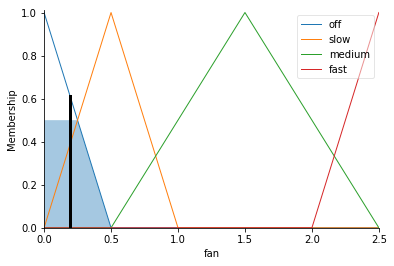

In [185]:
import random
import time

start = time.clock()
while time.clock() - start <10:
    a = ctrl.ControlSystemSimulation(fan_ctrl)
    a.input['temperature'] = random.randint(0,40)
    a.input['humidity'] = random.randint(0,100)
    a.input['amonia'] = random.randint(0,50)

print a.input
a.compute()
print(a.output['fan'])
fan.view(sim=f)

